<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/TAM2025-2/blob/main/ejercicio_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_regression
N = 1000
P = 20 #features
X, y = make_regression(n_samples=N, n_features=P,
                        noise=1, random_state=42)
print(X.shape)
print(y.shape)

(1000, 20)
(1000,)


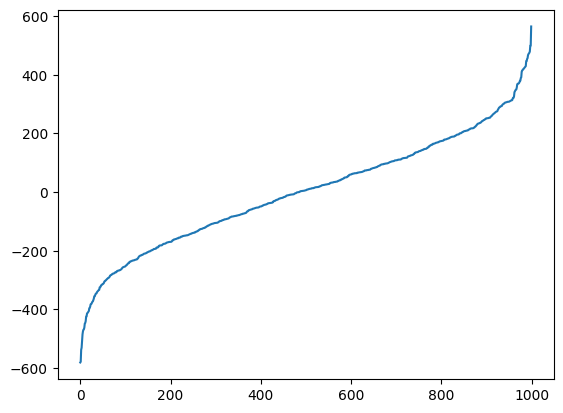

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

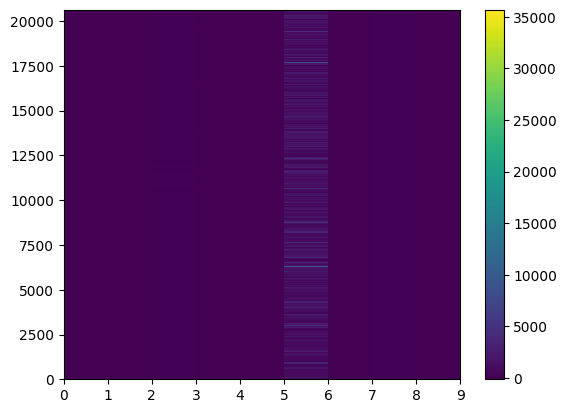

In [ ]:
ind_=np.argsort(y)
plt.pcolormesh(x) #reordena x filas de acuardo la amplitud de y
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y,lam_ = 1e-3): #fit, opt
  alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


<StemContainer object of 3 artists>

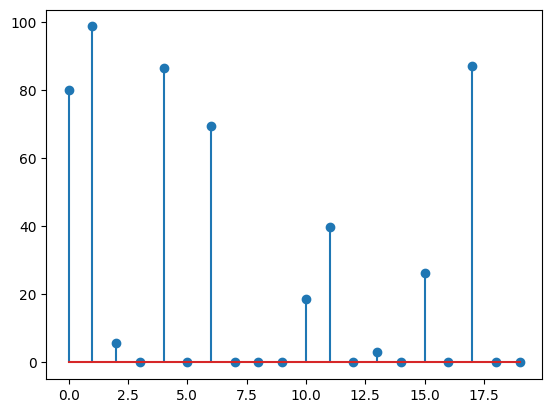

In [ ]:
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

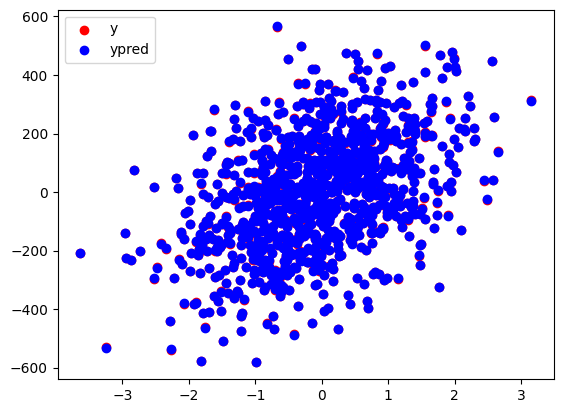

In [ ]:
plt.scatter(X[ind_,0],y[ind_],c='r',marker='o',label='y')
plt.scatter(X[ind_,0],ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


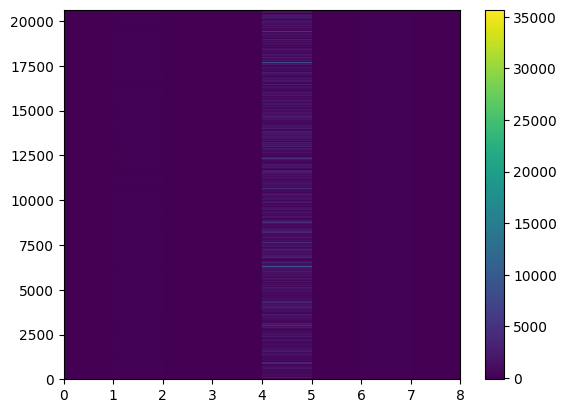

In [ ]:
X = housing.data
y = housing.target
print(X.shape,y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

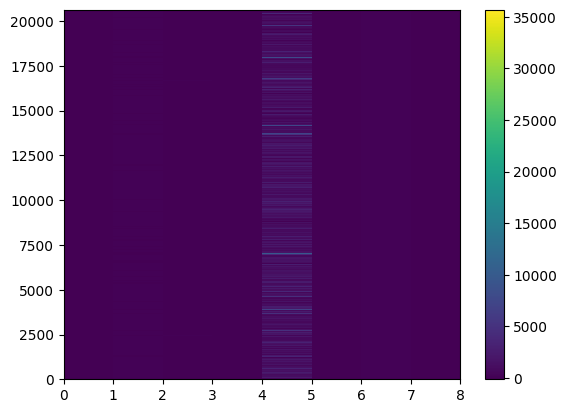

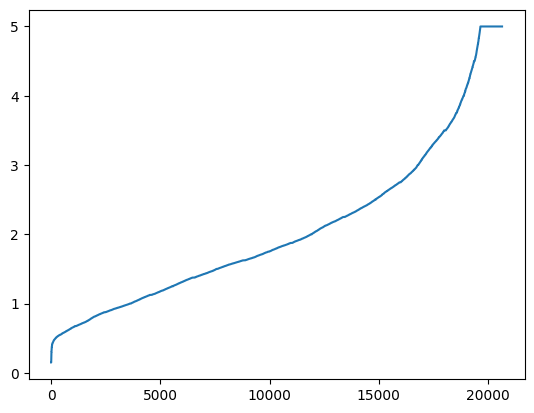

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(y[ind_])
plt.show()

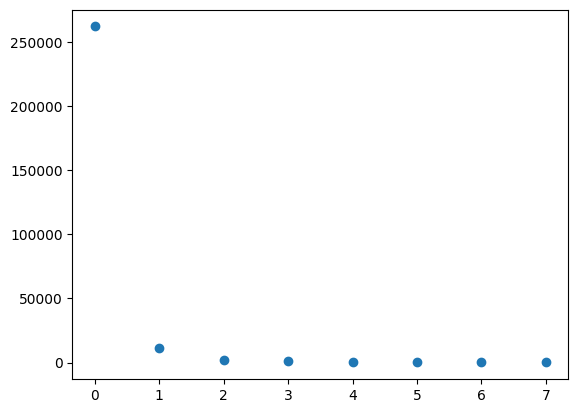

In [ ]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

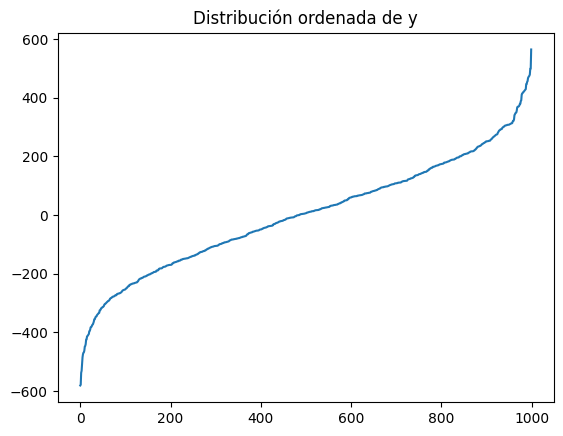

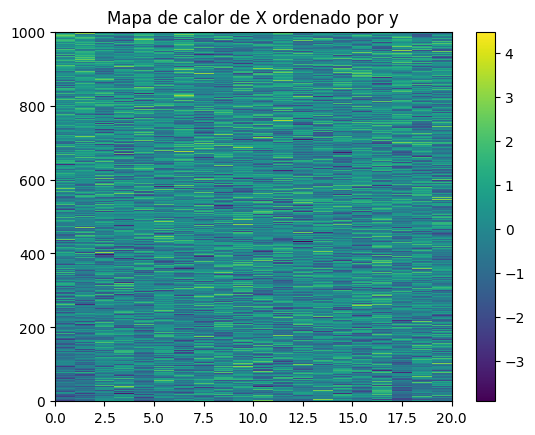

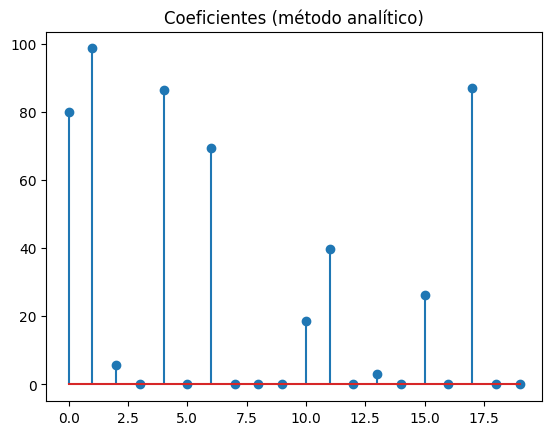

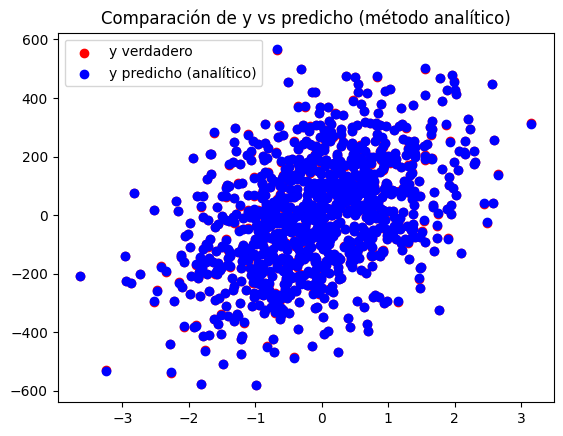

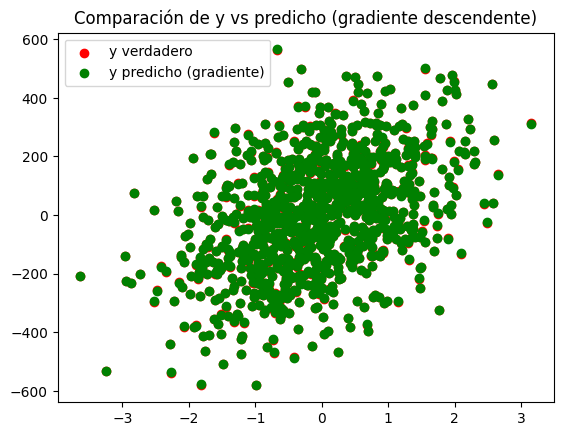

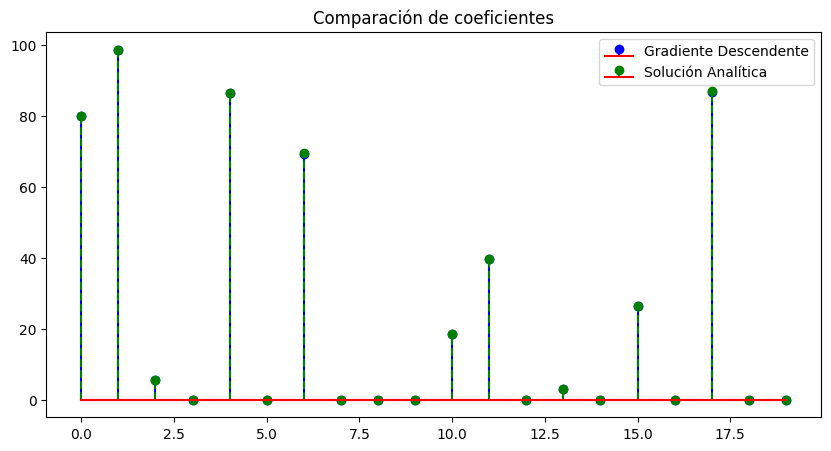

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# ==========================
# 1. Generar un conjunto de datos sintético
# ==========================
# N: número de muestras, P: número de características (features)
N = 1000
P = 20

# X: matriz de características, y: vector de etiquetas
X, y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)

# ==========================
# 2. Visualizar la distribución de y
# ==========================
plt.plot(np.sort(y))
plt.title("Distribución ordenada de y")
plt.show()

# ==========================
# 3. Visualizar X en orden de y (para ver patrones)
# ==========================
ind_ = np.argsort(y)  # índices que ordenan y
plt.pcolormesh(X[ind_])  # mostramos X ordenado por y
plt.colorbar()
plt.title("Mapa de calor de X ordenado por y")
plt.show()

# ==========================
# 4. Método analítico (mínimos cuadrados con regularización)
# ==========================
def mincua_reg(X, y, lam_ = 1e-3):  # lam_: regularización
    # Solución cerrada de Ridge: alpha = (X^T X + λI)^-1 X^T y
    alpha = np.linalg.inv(X.T.dot(X) + lam_ * np.eye(X.shape[1])).dot(X.T).dot(y)
    return alpha

# Obtener los coeficientes por método analítico
alpha_analitico = mincua_reg(X, y)

# Visualizar los coeficientes absolutos
plt.stem(np.arange(len(alpha_analitico)), np.abs(alpha_analitico))
plt.title("Coeficientes (método analítico)")
plt.show()

# ==========================
# 5. Predicción y visualización
# ==========================
ypred_analitico = X.dot(alpha_analitico)

plt.scatter(X[ind_, 0], y[ind_], c='r', marker='o', label='y verdadero')
plt.scatter(X[ind_, 0], ypred_analitico[ind_], c='b', label='y predicho (analítico)')
plt.legend()
plt.title("Comparación de y vs predicho (método analítico)")
plt.show()

# ==========================
# 6. Implementación de gradiente descendente con regularización Ridge
# ==========================
def gradient_descent_ridge(X, y, learning_rate=0.01, lambda_=1e-3, n_iters=1000):
    N, P = X.shape
    theta = np.zeros(P)  # Inicializamos coeficientes en ceros

    for i in range(n_iters):
        y_pred = X.dot(theta)             # Paso 1: predicción
        error = y_pred - y                # Paso 2: error de predicción
        gradient = (1/N) * X.T.dot(error) + lambda_ * theta  # Paso 3: gradiente
        theta = theta - learning_rate * gradient             # Paso 4: actualización de coeficientes

    return theta

# ==========================
# 7. Entrenamiento con gradiente descendente
# ==========================
theta_gradiente = gradient_descent_ridge(X, y, learning_rate=0.1, lambda_=1e-3, n_iters=1000)

# ==========================
# 8. Predicción y visualización (gradiente)
# ==========================
ypred_gradiente = X.dot(theta_gradiente)

plt.scatter(X[ind_, 0], y[ind_], c='r', marker='o', label='y verdadero')
plt.scatter(X[ind_, 0], ypred_gradiente[ind_], c='g', label='y predicho (gradiente)')
plt.legend()
plt.title("Comparación de y vs predicho (gradiente descendente)")
plt.show()

# ==========================
# 9. Comparar coeficientes entre ambos métodos
# ==========================
plt.figure(figsize=(10, 5))

# Coeficientes por gradiente
plt.stem(np.arange(len(theta_gradiente)), np.abs(theta_gradiente),
         linefmt='b-', markerfmt='bo', basefmt='r-', label='Gradiente Descendente')

# Coeficientes por solución analítica
plt.stem(np.arange(len(alpha_analitico)), np.abs(alpha_analitico),
         linefmt='g--', markerfmt='go', basefmt='r-', label='Solución Analítica')

plt.legend()
plt.title("Comparación de coeficientes")
plt.show()